In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy.optimize import fsolve
import mpmath as mp
from scipy.interpolate import interp1d
from tqdm import tqdm

In [2]:
k = 9.32
T_1 = 35
T_2 = 19
T_3 = 11
tau = 14

# k = 7.89
# T_1 = 18
# T_2 = 12
# T_3 = 5
# tau = 38

# Розділ 3. Розрахунок періодів квантування

## 3.1. Розрахунок на умові забезпечення необхідної точності керування

$$W_{O_1}(s) = \frac{k e^{-\tau s}}{T_1 s + 1}$$

Період квантування: $T_0 = \frac{\varepsilon}{B_{\max}}$, $B_{\max} = \frac{k}{T_1}$

eps = 0.01, T_0 = 0.0376
eps = 0.02, T_0 = 0.0751
eps = 0.03, T_0 = 0.1127
eps = 0.04, T_0 = 0.1502
eps = 0.05, T_0 = 0.1878


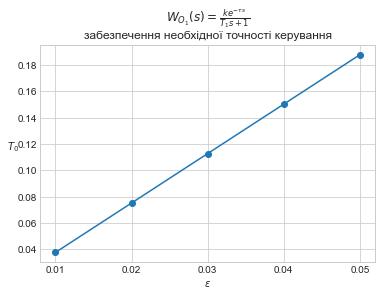

In [3]:
B_max = k / T_1
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
for e in eps:
    print(f'eps = {e}, T_0 = {e/B_max:.4f}')

plt.plot(eps, [e/B_max for e in eps])
plt.scatter(eps, [e/B_max for e in eps])
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_1}(s) = \\frac{k e^{-\\tau s}}{T_1 s + 1}$\nзабезпечення необхідної точності керування')
# plt.savefig('latex/pics/W_01_accur.png', dpi=300, bbox_inches='tight')
plt.show()

$$W_{O_2}(s) = \frac{k e^{-\tau s}}{(T_1 s + 1)(T_2 s + 1)}$$

Період квантування: $T_0 = \frac{\varepsilon}{B_{\max}}$, $B_{\max} = \frac{k}{T_1 + T_2}$

eps = 0.01, T_0 = 0.0579
eps = 0.02, T_0 = 0.1159
eps = 0.03, T_0 = 0.1738
eps = 0.04, T_0 = 0.2318
eps = 0.05, T_0 = 0.2897


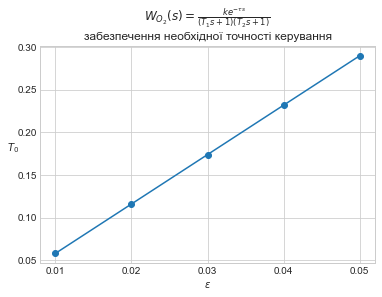

In [4]:
B_max = k / (T_1 + T_2)
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
for e in eps:
    print(f'eps = {e}, T_0 = {e/B_max:.4f}')

plt.plot(eps, [e/B_max for e in eps])
plt.scatter(eps, [e/B_max for e in eps])
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_2}(s) = \\frac{k e^{-\\tau s}}{(T_1 s + 1)(T_2 s + 1)}$\nзабезпечення необхідної точності керування')
# plt.savefig('latex/pics/W_02_accur.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.2. Розрахунок за критерієм Джурі

За цим критерієм період квантування обчислюється як $T_0 = \frac{\pi}{\omega_k}$, де 
$\omega_k$ - розв'язок рівняння
$$
    \left| W_{\text{з}}(j \omega_k) \right|
    = \left|
        \frac{W_O (j \omega_k) W_p (j \omega_k)}{
            1 + W_O (j \omega_k) W_p (j \omega_k)
        }
    \right| = \varepsilon
$$

### 3.2.1. Випадок $W_{O_1}(s) = \frac{k e^{-\tau s}}{T_1 s + 1}$

Згідно з розділом 4, оптимальним регулятором в цьому випадку є ПІ-регулятор з передаточною функцією 
$W_p(s) = K_p \left(1 + \frac{1}{T_I s}\right) = K_p \cdot \frac{T_1 s + 1}{T_1 s}$, де $K_p = \frac{\lambda T_1}{k \left(1 + \lambda \tau\right)}$, $\lambda = \frac{1}{T_1}$, $T_I = T_1$.
Знайдемо $\left| W_{\text{з}}(j\omega) \right|$:
$$
    \left| W_{\text{з}}(j\omega) \right| = \frac{
        \left| W_{O_1} (j \omega) W_p (j \omega) \right|
    }{
        \left| 1 + W_{O_1} (j \omega) W_p (j \omega) \right|
    } = 
    \frac{
        \left|\frac{k e^{-\tau j \omega}}{T_1 j \omega + 1} \cdot  K_p \cdot \frac{T_1 j \omega + 1}{T_1 j \omega} \right|
    }{
        \left|1 + \frac{k e^{-\tau j \omega}}{T_1 j \omega + 1} \cdot  K_p \cdot \frac{T_1 j \omega + 1}{T_1 j \omega} \right|
    } = \\ =
    \frac{
        \left|k K_p e^{-\tau j \omega} \right|
    }{
        \left|T_1 j \omega + k K_p  e^{-\tau j \omega} \right|
    } = \frac{
        1
    }{
        \left|1 + \frac{T_1}{k K_p} j \omega e^{\tau j \omega} \right|
    } = \frac{
        1
    }{
        \left|1 + \frac{T_1}{k K_p} j \omega \left(\cos \tau\omega + j \sin \tau\omega\right) \right|
    } = \\ =
    \frac{
        1
    }{
        \left| 1 + \frac{T_1}{k K_p}
        \left(j \omega \cos \tau\omega - \omega \sin \tau\omega\right) \right|
    } = \frac{
        1
    }{
        \left| 1 - \frac{T_1}{k K_p} \omega \sin \tau\omega + 
        j \frac{T_1}{k K_p} \omega \cos \tau\omega\right|
    } = \\ = \frac{
        1
    }{
        \sqrt{
            \left(1 - \frac{T_1}{k K_p} \omega \sin \tau\omega\right)^2 +
            \left(\frac{T_1}{k K_p} \omega \cos \tau\omega\right)^2
        }
    } = \frac{
        1
    }{
        \sqrt{
            \left(\frac{T_1}{k K_p}\right)^2 \omega^2 - 2\frac{T_1}{k K_p} \omega \sin \tau\omega + 1
        }
    }
$$
Отже, $\left| W_{\text{з}}(j\omega) \right| = \varepsilon \Leftrightarrow \left(\frac{T_1}{k K_p}\right)^2 \omega^2 - 2\frac{T_1}{k K_p} \omega \sin \tau\omega + 1 = \frac{1}{\varepsilon^2}$.

eps = 0.01, w_k = 2.0361, T_0 = 1.5430
eps = 0.02, w_k = 1.0391, T_0 = 3.0234
eps = 0.03, w_k = 0.6785, T_0 = 4.6304
eps = 0.04, w_k = 0.5285, T_0 = 5.9449
eps = 0.05, w_k = 0.3937, T_0 = 7.9803


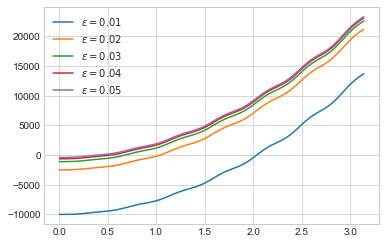

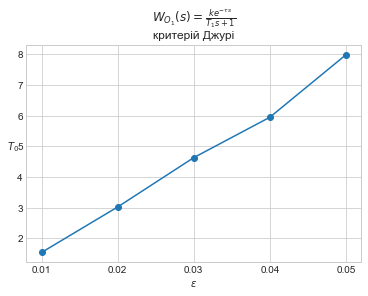

In [5]:
K_p = 1 / (k * (1 + tau/T_1))
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
T_0_val = []
for e in eps:
    plt.plot(np.linspace(0, np.pi, 100), [(T_1 * w / (k * K_p))**2 - 2 * T_1 * w / (k * K_p) * np.sin(tau * w) + 1 - 1/e**2 for w in np.linspace(0, np.pi, 100)], label=f'$\\varepsilon = {e}$')
    w_k = fsolve(lambda w: (T_1 * w / (k * K_p))**2 - 2 * T_1 * w / (k * K_p) * np.sin(tau * w) + 1 - 1/e**2, x0=0.5)[0]
    T_0_val.append(np.pi / w_k)
    print(f'eps = {e}, w_k = {w_k:.4f}, T_0 = {np.pi / w_k:.4f}')
plt.legend()
plt.show()

plt.plot(eps, T_0_val)
plt.scatter(eps, T_0_val)
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_1}(s) = \\frac{k e^{-\\tau s}}{T_1 s + 1}$\nкритерій Джурі')
plt.savefig('latex/pics/W_01_Jury.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2.2. Випадок $W_{O_2}(s) = \frac{k e^{-\tau s}}{(T_1 s + 1)(T_2 s + 1)}$

## 3.3. Розрахунок для об'єкта з динамікою в чисельнику

$$W_{O}(s) = \frac{k(T_1 s + 1)}{(T_2 s + 1)(T_3 s + 1)} = \frac{k(bT s + 1)}{T_1^2 s^2 + 2\nu T s + 1}$$

In [6]:
T = np.sqrt(T_2 * T_3)
b = T_1 / T
nu = (T_2 + T_3) / (2 * T)
theta = 31

Розв'яжемо рівняння $\left|W_O (j \omega_{\text{зр}})\right| = \frac{1}{\theta}$, де $\omega_{\text{зр}} = \frac{q}{T}$, $\theta = 31$. Еквівалентне: $q^4 + q^2 \left(4 \nu^2 - b^2 k^2 \theta^2 - 2\right) q^2 + \left(1 - k^2 \theta^2\right) = 0$.

In [7]:
print(4 * nu**2 - b**2 * k**2 * theta**2 - 2, 1 - k**2 * theta**2)
roots_squared = np.roots([1, 4 * nu**2 - b**2 * k**2 * theta**2 - 2, 1 - k**2 * theta**2])
print(f'{roots_squared[0]:.5f} {roots_squared[1]:.5f}')

-489263.66909090895 -83473.76640000001
489263.83970 -0.17061


Період квантування: $T_0 = \frac{\pi T}{q}$

In [8]:
q = np.sqrt(roots_squared.max())
print(f'q = {q:.4f}')
print(f'T_0 = {np.pi * T / q:.4f}')

q = 699.4740
T_0 = 0.0649


# Розділ 4. Визначення структури та оптимальних настройок регуляторів методом «прямого» синтезу

Згідно з методичними рекомендаціями, оптимальні параметри ПІ-регулятора з ДПФ 
$K_p \left(
    1 + \frac{T_0}{T_I \left(1 - z^{-1}\right)}
\right)$
визначаються за формулами
$$
    K_{p_{\text{опт}}} = \frac{
        1 - e^{-\lambda T_0}
    }{
        k \left(e^{T_0 / T_1} - 1\right) \left(1 + d \left(1 - e^{-\lambda T_0}\right)\right)
    } \\
    T_{I_{\text{опт}}} = \frac{T_0}{e^{T_0 / T_1} - 1}
$$
де $d$ - ціла частина від ділення часу запізнення $\tau$ на період квантування
$T_0$, який беремо на основі умови забезпечення необхідної точності керування.

In [9]:
T_0 = 0.03 * T_1 / k
d = int(np.floor(tau / T_0))
def K_p_opt(l):
    return (1 - np.exp(-T_0 * l))/(k * (np.exp(T_0/T_1)-1) * (1 + d * (1 - np.exp(-T_0 * l))));

T_I_opt = T_0 / (np.exp(T_0 / T_1) - 1)

print(f'd = {d}')
print(f'T_I_opt = {T_I_opt:.4f}')

for l in [1/T_1, 1/(1.5 * T_1), 1/(2*T_1), 1/(3*T_1)]:
    print(f'lambda = {l:.4f}, K_p_opt = {K_p_opt(l):.4f}')    

d = 124
T_I_opt = 34.9437
lambda = 0.0286, K_p_opt = 0.0765
lambda = 0.0190, K_p_opt = 0.0564
lambda = 0.0143, K_p_opt = 0.0446
lambda = 0.0095, K_p_opt = 0.0315


Для вказаного набору параметрів настройки $\lambda$ шляхом цифрового моделювання побудувати перехідні процеси в замкненому контурі цифрового керування. Рекурентне рівняння, за яким буде відбуватися моделювання:
$$
    y_n = \left(1 + e^{-T_0/T_1}\right) y_{n-1} - e^{-T_0/T_1} y_{n-2} - \\ -
    \frac{k K_{p_{\text{опт}}}}{T_I} \left(
        \left(C_1 T_{I_{\text{опт}}} + C_1 T_0\right) y_{n-d-1} + 
        \left(-C_1 T_{I_{\text{опт}}} + C_2 T_{I_{\text{опт}}} + C_2 T_0\right) y_{n-d-2} -
        C_2 T_I y_{n-d-3}
    \right) + \\  + \frac{k K_{p_{\text{опт}}}}{T_I} \left(
        \left(C_1 T_{I_{\text{опт}}} + C_1 T_0\right) g_{n-d-1} + 
        \left(-C_1 T_{I_{\text{опт}}} + C_2 T_{I_{\text{опт}}} + C_2 T_0\right) g_{n-d-2} -
        C_2 T_I g_{n-d-3}
    \right)
$$
де $a = 1 - \frac{\tau - d T_0}{T_0}$, $C_1 = 1 - e^{-\frac{a T_0}{T_1}}$,
$C_2 = e^{-\frac{a T_0}{T_1}} - e^{-\frac{T_0}{T_1}}$, початкові умови для $y$ нульові,
а $g_n = 1$.

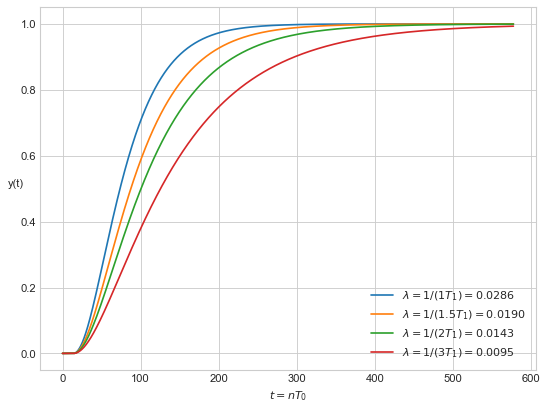

In [10]:
a = 1 - (tau - d*T_0)/T_0
C_1 = 1 - np.exp(-a * T_0 / T_1)
C_2 = np.exp(-a * T_0 / T_1) - np.exp(-T_0 / T_1)

modeling_steps = 5000

plt.figure(figsize=(8, 6), dpi=80)
for multpl in [1, 1.5, 2, 3]:
     l = 1/(multpl * T_1)
     K_p = K_p_opt(l)

     y_out = [0] * (d + 3)
     g_in = [1] * (d + 3)
     for n in range(d+3, d+3+modeling_steps):
          g_in.append(1)
          y_out.append(
               (1 + np.exp(-T_0/T_1)) * y_out[n-1] - np.exp(-T_0/T_1) * y_out[n-2] - k*K_p/T_I_opt * (
                    C_1 * (T_I_opt + T_0) * y_out[n-d-1] + (-C_1 * T_I_opt + C_2 * T_I_opt + C_2 * T_0) * y_out[n-d-2] -C_2 * T_I_opt * y_out[n-d-3]
               ) + k*K_p/T_I_opt * (
                    C_1 * (T_I_opt + T_0) * g_in[n-d-1] + (-C_1 * T_I_opt + C_2 * T_I_opt + C_2 * T_0) * g_in[n-d-2] -C_2 * T_I_opt * g_in[n-d-3]
               )
           )
     plt.plot(np.arange(len(y_out))*T_0, y_out, label=f'$\lambda = 1/({multpl} T_1) ={l:.4f}$')


plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.legend()
# plt.savefig('latex/pics/transient_process_task_4.png', bbox_inches='tight', dpi=300)
plt.show()

# Розділ 5. Розрахунок оптимальних параметрів ПІ-регулятора і періоду квантування резонансним методом

## 5.1. Випадок $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1) (T_3 s + 1)}$

а) Шляхом розв'язання відносно частоти $\omega$ нелінійного рівняння
$$
        \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau = 2.62
$$
знаходимо резонансну частоту $\omega_{\varphi_H}$ для неперервного контура керування.

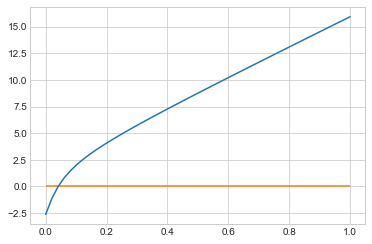

In [11]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [12]:
w_phi_H = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau - 2.62, x0=0.0)[0]
print(f'w_phi_H = {w_phi_H:.5f}')

w_phi_H = 0.04096


б) Визначаємо верхню та нижню частоту відносно резонансної частоти неперервної системи:
$\omega_{\varphi_H}^H = \frac{\omega_{\varphi_H}}{\sqrt{2}}$, $\omega_{\varphi_H}^B = {\sqrt{2}}{\omega_{\varphi_H}}$

In [13]:
w_phi_H_H = w_phi_H / np.sqrt(2)
w_phi_H_B = w_phi_H * np.sqrt(2)
print(f'w_phi_H_H = {w_phi_H_H:.5f}')
print(f'w_phi_H_B = {w_phi_H_B:.5f}')

w_phi_H_H = 0.02897
w_phi_H_B = 0.05793


в) Використовуючи знайдену частоту $\omega_{\varphi_H}$, за формулою
$$
        A(\omega) = \frac{k}{\sqrt{\left(1+\omega^2 T_1^2\right)\left(1+\omega^2 T_2^2\right)\left(1+\omega^2 T_3^2\right)}}

$$
знаходимо другий основний динамічний параметр неперервного контура в частотній області 
$A_H\left(\omega_{\varphi_H}\right)$. Також, знайдемо третій основний параметр
$\Phi_H(A) = \frac{A(\omega_{\varphi_H}^B)}{A(\omega_{\varphi_H}^H)}$.

In [14]:
A_w_H = lambda w: k/np.sqrt(
    (1 + w**2 * T_1**2) * (1 + w**2 * T_2**2) * (1 + w**2 * T_3**2)
)
A_H_w_phi_H = A_w_H(w_phi_H)
Phi_H_A = A_w_H(w_phi_H_B) / A_w_H(w_phi_H_H)
print(f'A_H_w_phi_H = {A_H_w_phi_H:.5f}')
print(f'Phi_H_A = {Phi_H_A:.5f}')

A_H_w_phi_H = 3.83604
Phi_H_A = 0.42790


г) Використовуючи вираз 
$$
    \varphi(\omega) = \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau
$$
визначаємо четвертий основний параметр в частотній області для неперервного контуру:
$\Phi_H(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.


In [15]:
phi_w_H = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau
Phi_H_phi = phi_w_H(w_phi_H_B) - phi_w_H(w_phi_H_H)
print(f'Phi_H_phi = {Phi_H_phi:.5f}')

Phi_H_phi = 1.31497


д) За емпіричними формулами визначаємо оптимальні коефіцієнти настройки неперервного ПІ-регулятора
та оптимальний період квантування:
$$
    T_{I_{\text{опт}}}^{\text{неп}} = 
    \frac{4.061 \cdot \Phi_H(A)^{-0.3387} \cdot \Phi_H(\varphi)^{0.2075}}{\omega_{\varphi_H}} \\
    K_{p_{\text{опт}}}^{\text{неп}} = \frac{1}{2 A_H\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi_H(A)^{0.7139}\cdot \left(1.852 - \Phi_H(\varphi)\right)^{0.8643}
    \right) \\
    T_{0_{\text{опт}}} = \frac{
        0.5742 \cdot \Phi_H(A)^{0.5742} \Phi_H(\varphi)^{0.9394}
    }{\omega_{\varphi_H}}
$$

In [16]:
T_I_opt_HEP = (
    4.061 * Phi_H_A ** (-0.3387) * Phi_H_phi ** (0.2075)
) / w_phi_H
K_p_opt_HEP = (
    1 + 1.189 * Phi_H_A ** (0.7139) * (1.852 - Phi_H_phi) ** 0.8643
) / (2 * A_H_w_phi_H)
T_0_opt = (
    0.5742 * Phi_H_A ** (0.5742) * Phi_H_phi ** (0.9394)
) / w_phi_H
print(f'T_I_opt_HEP = {T_I_opt_HEP:.5f}')
print(f'K_p_opt_HEP = {K_p_opt_HEP:.5f}')
print(f'T_0_opt = {T_0_opt:.5f}')

T_I_opt_HEP = 139.88408
K_p_opt_HEP = 0.17974
T_0_opt = 11.13496


е) При оптимальному періоду квантування визначаємо чотири основні параметри 
$\omega_{\varphi}$, $A\left(\omega_{\varphi}\right)$, $\Phi(A)$, $\Phi(\varphi)$
в частотній області при врахуванні ПНЧ об'єкта. Для цього використаємо рівняння
$$
    A(\omega) = A_H(\omega) \cdot \frac{
        \sin {\frac{\omega T_{0_{\text{опт}}}}{2}}
    }{
        {\frac{\omega T_{0_{\text{опт}}}}{2}}
    } \\
    \varphi(\omega) = 
    \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau + {\frac{\omega T_{0_{\text{опт}}}}{2}} 
$$
Шляхом розв'язання $\varphi(\omega) = 2.62$ знаходимо частоту 
$\omega_{\varphi}$, а потім за рівняннями знаходимо 
$A\left(\omega_{\varphi}\right)$, 
$\Phi(A) = \frac{A\left((\omega_{\varphi_H}^B\right)}{A\left(\omega_{\varphi_H}^H\right)}$, 
$\Phi(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

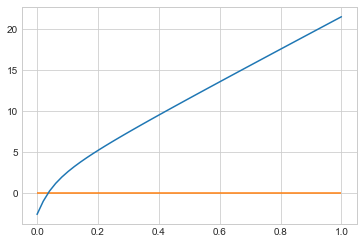

In [17]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2 - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [18]:
w_phi = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2 - 2.62, x0=0.0)[0]
print(f'w_phi = {w_phi:.5f}')

A_w = lambda w: A_w_H(w) * np.sin(w * T_0_opt / 2) / (w * T_0_opt / 2)

A_w_phi = A_w(w_phi)
print(f'A_w_phi = {A_w_phi:.5f}')

Phi_A = A_w(w_phi * np.sqrt(2)) / A_w(w_phi / np.sqrt(2))
print(f'Phi_A = {Phi_A:.5f}')

phi_w = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2
Phi_phi = phi_w(w_phi * np.sqrt(2)) - phi_w(w_phi / np.sqrt(2))
print(f'Phi_phi = {Phi_phi:.5f}')

w_phi = 0.03670
A_w_phi = 4.32464
Phi_A = 0.46223
Phi_phi = 1.39902


ж) При оптимальному періоді квантування $T_{0_{\text{опт}}}$ знаходимо 
оптимальні значення $T_{I_{\text{опт}}}$ та $K_{p_{\text{опт}}}$ за формулами
$$
    T_{I_{\text{опт}}} = 
    \frac{4.061 \cdot \Phi(A)^{-0.3387} \cdot \Phi(\varphi)^{0.2075}}{\omega_{\varphi}} \\
    K_{p_{\text{опт}}} = \frac{1}{2 A\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi(A)^{0.7139}\cdot \left(1.852 - \Phi(\varphi)\right)^{0.8843}
    \right)
$$

In [19]:
T_I_opt = (
    4.061 * Phi_A ** (-0.3387) * Phi_phi ** (0.2075)
) / w_phi
K_p_opt = (
    1 + 1.189 * Phi_A ** (0.7139) * (1.852 - Phi_phi)  ** (0.8843)
) / (2 * A_w_phi)
print(f'T_I_opt = {T_I_opt:.5f}')
print(f'K_p_opt = {K_p_opt:.5f}')

T_I_opt = 154.07932
K_p_opt = 0.15495


Для цифрового моделювання перехідного процесу вихідної координати $y$ скористаємося передаточною функцією $W_\text{з}(s)$:
$$
    y(s) = W_\text{з}(s) G(s) = \frac{W_p(s) W_O(s)}{1 + W_p(s) W_O(s)} G(s) \\
    W_p(s) = K_{p_{\text{опт}}} \left(1 + \frac{1}{T_{I_{\text{опт}}} s}\right), \;
    G(s) = \frac{1}{s} \left(1 - e^{-s T_{0_{\text{опт}}}}\right)
$$

Чисельно знайшовши обернене перетворення Лапласа від $y(s)$ в моменти $n T_{0_{\text{опт}}}$, 
отримаємо значення вихідної координати при подачі на задаюче діяння одиничного імпульсу довжиною $T_{0_{\text{опт}}}$.

100%|██████████| 89/89 [00:03<00:00, 29.48it/s]


A = 0.29424, B = 0.04990
B / A = 0.16958


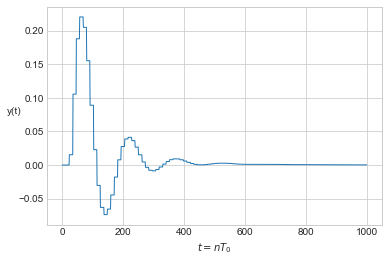

In [20]:
W_obj = lambda s: k * mp.exp(- tau * s) / ((T_1 * s + 1) * (T_2 * s + 1) * (T_3 * s + 1))
W_reg = lambda s: K_p_opt * (1 + 1 / (T_I_opt * s))
G = lambda s: (1 - mp.exp(- s * T_0_opt)) / s

W_zamk = lambda s: (W_obj(s) * W_reg(s) / (1 + W_obj(s) * W_reg(s))) * G(s)

y_out = lambda t: mp.invertlaplace(W_zamk, t, method='dehoog') if t > 0 else 0

max_modeling_time = 1000
t_discr = np.linspace(0, max_modeling_time, num=int(max_modeling_time/T_0_opt))
y_val = np.array([float(y_out(t)) for t in tqdm(t_discr)])

A = y_val.max() - y_val.min()
B = y_val[y_val.argmin():].max() - y_val[y_val.argmin():][y_val[y_val.argmin():].argmax():].min()
print(f'A = {A:.5f}, B = {B:.5f}')
print(f'B / A = {(B / A):.5f}')

interp = interp1d(t_discr, y_val, kind='zero')
t_domain = np.linspace(0, max_modeling_time, num=max_modeling_time)

plt.plot(t_domain, interp(t_domain), linewidth=1)
plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.savefig('latex/pics/transient_process_task_5_1.png', bbox_inches='tight', dpi=300)
plt.show()

## 5.2. Випадок $W_{O_2}(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1)}$

а) Шляхом розв'язання відносно частоти $\omega$ нелінійного рівняння
$$
        \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau = 2.62
$$
знаходимо резонансну частоту $\omega_{\varphi_H}$ для неперервного контура керування.

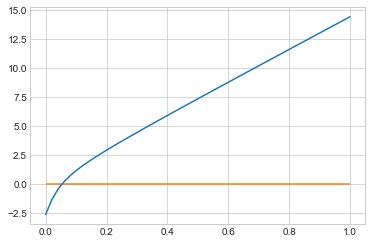

In [21]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [22]:
w_phi_H = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau - 2.62, x0=0.0)[0]
print(f'w_phi_H = {w_phi_H:.5f}')

w_phi_H = 0.05341


б) Визначаємо верхню та нижню частоту відносно резонансної частоти неперервної системи:
$\omega_{\varphi_H}^H = \frac{\omega_{\varphi_H}}{\sqrt{2}}$, $\omega_{\varphi_H}^B = {\sqrt{2}}{\omega_{\varphi_H}}$

In [23]:
w_phi_H_H = w_phi_H / np.sqrt(2)
w_phi_H_B = w_phi_H * np.sqrt(2)
print(f'w_phi_H_H = {w_phi_H_H:.5f}')
print(f'w_phi_H_B = {w_phi_H_B:.5f}')

w_phi_H_H = 0.03777
w_phi_H_B = 0.07553


в) Використовуючи знайдену частоту $\omega_{\varphi_H}$, за формулою
$$
        A(\omega) = \frac{k}{\sqrt{\left(1+\omega^2 T_1^2\right)\left(1+\omega^2 T_2^2\right)}}
$$
знаходимо другий основний динамічний параметр неперервного контура в частотній області 
$A_H\left(\omega_{\varphi_H}\right)$. Також, знайдемо третій основний параметр
$\Phi_H(A) = \frac{A(\omega_{\varphi_H}^B)}{A(\omega_{\varphi_H}^H)}$.

In [24]:
A_w_H = lambda w: k/np.sqrt(
    (1 + w**2 * T_1**2) * (1 + w**2 * T_2**2)
)
A_H_w_phi_H = A_w_H(w_phi_H)
Phi_H_A = A_w_H(w_phi_H_B) / A_w_H(w_phi_H_H)
print(f'A_H_w_phi_H = {A_H_w_phi_H:.5f}')
print(f'Phi_H_A = {Phi_H_A:.5f}')

A_H_w_phi_H = 3.08583
Phi_H_A = 0.41264


г) Використовуючи вираз 
$$
    \varphi(\omega) = \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau
$$
визначаємо четвертий основний параметр в частотній області для неперервного контуру:
$\Phi_H(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

In [25]:
phi_w_H = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau
Phi_H_phi = phi_w_H(w_phi_H_B) - phi_w_H(w_phi_H_H)
print(f'Phi_H_phi = {Phi_H_phi:.5f}')

Phi_H_phi = 1.15456


д) За емпіричними формулами визначаємо оптимальні коефіцієнти настройки неперервного ПІ-регулятора
та оптимальний період квантування:
$$
    T_{I_{\text{опт}}}^{\text{неп}} = 
    \frac{4.061 \cdot \Phi_H(A)^{-0.3387} \cdot \Phi_H(\varphi)^{0.2075}}{\omega_{\varphi_H}} \\
    K_{p_{\text{опт}}}^{\text{неп}} = \frac{1}{2 A_H\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi_H(A)^{0.7139}\cdot \left(1.852 - \Phi_H(\varphi)\right)^{0.8643}
    \right) \\
    T_{0_{\text{опт}}} = \frac{
        0.5742 \cdot \Phi_H(A)^{0.5742} \Phi_H(\varphi)^{0.9394}
    }{\omega_{\varphi_H}}
$$

In [26]:
T_I_opt_HEP = (
    4.061 * Phi_H_A ** (-0.3387) * Phi_H_phi ** (0.2075)
) / w_phi_H
K_p_opt_HEP = (
    1 + 1.189 * Phi_H_A ** (0.7139) * (1.852 - Phi_H_phi) ** (0.8643)
) / (2 * A_H_w_phi_H)
T_0_opt = (
    0.5742 * Phi_H_A ** (0.5742) * Phi_H_phi ** (0.9394)
) / w_phi_H
print(f'T_I_opt_HEP = {T_I_opt_HEP:.5f}')
print(f'K_p_opt_HEP = {K_p_opt_HEP:.5f}')
print(f'T_0_opt = {T_0_opt:.5f}')

T_I_opt_HEP = 105.72649
K_p_opt_HEP = 0.23703
T_0_opt = 7.40205


е) При оптимальному періоду квантування визначаємо чотири основні параметри 
$\omega_{\varphi}$, $A\left(\omega_{\varphi}\right)$, $\Phi(A)$, $\Phi(\varphi)$
в частотній області при врахуванні ПНЧ об'єкта. Для цього використаємо рівняння
$$
    A(\omega) = A_H(\omega) \cdot \frac{
        \sin {\frac{\omega T_{0_{\text{опт}}}}{2}}
    }{
        {\frac{\omega T_{0_{\text{опт}}}}{2}}
    } \\
    \varphi(\omega) = 
    \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau + {\frac{\omega T_{0_{\text{опт}}}}{2}} 
$$
Шляхом розв'язання $\varphi(\omega) = 2.62$ знаходимо частоту 
$\omega_{\varphi}$, а потім за рівняннями знаходимо 
$A\left(\omega_{\varphi}\right)$, 
$\Phi(A) = \frac{A\left((\omega_{\varphi_H}^B\right)}{A\left(\omega_{\varphi_H}^H\right)}$, 
$\Phi(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

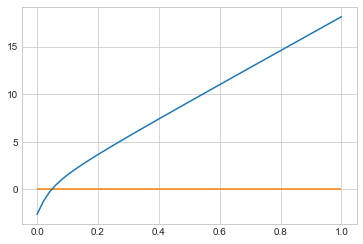

In [27]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2 - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [28]:
w_phi = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2 - 2.62, x0=0.0)[0]
print(f'w_phi = {w_phi:.5f}')

A_w = lambda w: A_w_H(w) * np.sin(w * T_0_opt / 2) / (w * T_0_opt / 2)

A_w_phi = A_w(w_phi)
print(f'A_w_phi = {A_w_phi:.5f}')

Phi_A = A_w(w_phi * np.sqrt(2)) / A_w(w_phi / np.sqrt(2))
print(f'Phi_A = {Phi_A:.5f}')

phi_w = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2
Phi_phi = phi_w(w_phi * np.sqrt(2)) - phi_w(w_phi / np.sqrt(2))
print(f'Phi_phi = {Phi_phi:.5f}')

w_phi = 0.04792
A_w_phi = 3.51065
Phi_A = 0.43618
Phi_phi = 1.23981


ж) При оптимальному періоді квантування $T_{0_{\text{опт}}}$ знаходимо 
оптимальні значення $T_{I_{\text{опт}}}$ та $K_{p_{\text{опт}}}$ за формулами
$$
    T_{I_{\text{опт}}} = 
    \frac{4.061 \cdot \Phi(A)^{-0.3387} \cdot \Phi(\varphi)^{0.2075}}{\omega_{\varphi}} \\
    K_{p_{\text{опт}}} = \frac{1}{2 A\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi(A)^{0.7139}\cdot \left(1.852 - \Phi(\varphi)\right)^{0.8843}
    \right)
$$

In [29]:
T_I_opt = (
    4.061 * Phi_A ** (-0.3387) * Phi_phi ** (0.2075)
) / w_phi
K_p_opt = (
    1 + 1.189 * Phi_A ** (0.7139) * (1.852 - Phi_phi) ** (0.8843)
) / (2 * A_w_phi)
print(f'T_I_opt = {T_I_opt:.5f}')
print(f'K_p_opt = {K_p_opt:.5f}')

T_I_opt = 117.36092
K_p_opt = 0.20311


Цифрове моделювання перехідного процесу вихідної координати $y$ проведемо аналогічно попередньому пункту.

100%|██████████| 135/135 [00:04<00:00, 29.14it/s]


A = 0.30244, B = 0.10631
B / A = 0.35151


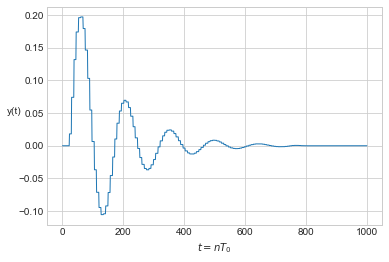

In [30]:
W_obj = lambda s: k * mp.exp(- tau * s) / ((T_1 * s + 1) * (T_2 * s + 1) * (T_3 * s + 1))
W_reg = lambda s: K_p_opt * (1 + 1 / (T_I_opt * s))
G = lambda s: (1 - mp.exp(- s * T_0_opt)) / s

W_zamk = lambda s: (W_obj(s) * W_reg(s) / (1 + W_obj(s) * W_reg(s))) * G(s)

y_out = lambda t: mp.invertlaplace(W_zamk, t, method='dehoog') if t > 0 else 0

max_modeling_time = 1000
t_discr = np.linspace(0, max_modeling_time, num=int(max_modeling_time/T_0_opt))
y_val = np.array([float(y_out(t)) for t in tqdm(t_discr)])

A = y_val.max() - y_val.min()
B = y_val[y_val.argmin():].max() - y_val[y_val.argmin():][y_val[y_val.argmin():].argmax():].min()
print(f'A = {A:.5f}, B = {B:.5f}')
print(f'B / A = {(B / A):.5f}')

interp = interp1d(t_discr, y_val, kind='zero')
t_domain = np.linspace(0, max_modeling_time, num=max_modeling_time)

plt.plot(t_domain, interp(t_domain), linewidth=1)
plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.savefig('latex/pics/transient_process_task_5_2.png', bbox_inches='tight', dpi=300)
plt.show()